# Assignment 2 - Continuous Visualization

Imagine you're a data scientist working for the University of Michigan teaching and learning team, and one of your job responsibilities is to offer instructional advice based on course performance metrics. As part of this activity you might be asked to analyze student's grade distribution in a range of undergraduate and graduate level courses to draw comparisons between courses and come up with insights regarding how to enhance residential education across different subjects.

## Question 1: Grade Distribution Comparison (60%)

Now you have impressed the management team, you have been given a sample data file `assets/class_grades.csv` for a number of courses, and you have been asked to consider the letter grades for STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, EECS 545 for the past records since 2015. The student grades are stored in 6 columns: 
* `STATS250_grade` stores the letter grades for those who took the STATS 250 course
* `DATASCI306_grade` stores the letter grades for those who took the DATASCI 306 course
* `MATH217_grade` stores the letter grades for those who took the MATH 217 course
* `ENGLISH125_grade` stores the letter grades for those who took the ENGLISH 125 course
* `ECON101_grade` stores the letter grades for those who took the ECON 101 course
* `EECS545_grade` stores the letter grades for those who took the EECS 545 course

Prior to drawing plots for student grade distribution, it's useful to compute the total student enrollments for each course (of course, you need to ignore NAN values) and convert student's letter grades into standard grade points. Here's a nice table on the grade point systems available at the umich website:

| Letter Grade | Grade Point |
|:---: |:----:|
| A+ | 4.3 |
| A | 4.0 |
| A- | 3.7 |
| B+ | 3.3 |
| B | 3 |
| B- | 2.7 |
| C+ | 2.3 |
| C | 2 |
| C- | 1.7 |
| D+ | 1.3 |
| D | 1 |
| D- | 0.7 |
| E | 0 |

You are asked to:
* Make a **3 * 2** figure (so 6 subplots) such that for each course you have a **histogram** using the student grade samples respectively
* Remove the gaps between the bars in the histograms if any
* For each probability plot, you should overlay a normal distribution with the same mean and standard deviation parameters as you see in the samples (you can calculate this!)
* You should of course use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis

Hints:
* To make subplots, one good way to start with is to use `fig, ax = plt.subplot()`
* To remove the gaps that might show up in histograms, you can customize the `bins` parameter
* If you want to make histograms using the distplot function in seaborn package, you need to specify the parameters `kde = False` and `norm_hist = True`

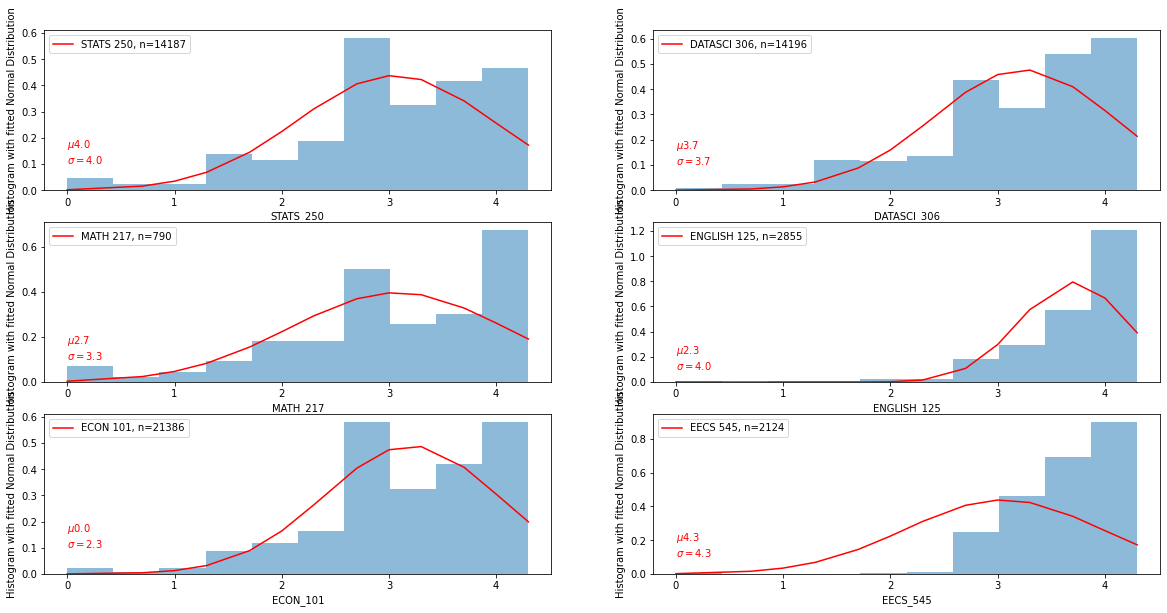

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
Class_Grades = pd.read_csv("class_grades.csv")

VALID_GRADES = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E']
NUMERIC_GRADES = [4.3, 4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]

# rename the columns
STATS_250 = Class_Grades['STATS250_grade'] 
DATASCI_306 = Class_Grades['DATASCI306_grade'] 
MATH_217 = Class_Grades['MATH217_grade'] 
ENGLISH_125 = Class_Grades['ENGLISH125_grade'] 
ECON_101 = Class_Grades['ECON101_grade'] 
EECS_545 = Class_Grades['EECS545_grade'] 

def toGradeLevel(grade_letter):
    if grade_letter == 'A+': return 4.3
    elif grade_letter == 'A': return 4.0
    elif grade_letter == 'A-': return 3.7
    elif grade_letter == 'B+': return 3.3
    elif grade_letter == 'B': return 3.0
    elif grade_letter == 'B-': return 2.7
    elif grade_letter == 'C+': return 2.3
    elif grade_letter == 'C': return 2.0
    elif grade_letter == 'C-': return 1.7
    elif grade_letter == 'D+': return 1.3
    elif grade_letter == 'D': return 1.0
    elif grade_letter == 'D-': return 0.7
    elif grade_letter == 'E': return 0.0

def grade_data():
    # Now to get plots like this we want to convert our letter grades into numeric equivalents, so let's just create a mapping dictionary
    grade_point_dict = dict(zip(VALID_GRADES, NUMERIC_GRADES))
    #And now let's apply that dictionary to our dataframe, replacing values as appropriate
    grade_dist_STATS_250 = STATS_250.dropna().apply(lambda x: toGradeLevel(x))
    grade_dist_DATASCI_306 = DATASCI_306.dropna().apply(lambda x: toGradeLevel(x))
    grade_dist_MATH_217 = MATH_217.dropna().apply(lambda x: toGradeLevel(x))
    grade_dist_ENGLISH_125 = ENGLISH_125.dropna().apply(lambda x: toGradeLevel(x))
    grade_dist_ECON_101 = ECON_101.dropna().apply(lambda x: toGradeLevel(x))
    grade_dist_EECS_545 = EECS_545.dropna().apply(lambda x: toGradeLevel(x))
    
    
    #We're going to create six plots here 
    fig, axs = plt.subplots(3, 2, figsize=(20,10))
    axs[0][0].hist(x=grade_dist_STATS_250, alpha=0.5, bins=10, density=True)
    axs[0][0].text(x=np.min(grade_dist_STATS_250), y=0.1, s=r"$\mu%0.1f$" % grade_dist_STATS_250[0] + "\n" + r"$\sigma=%0.1f$" % grade_dist_STATS_250[1], color='r')
    axs[0][0].plot(sorted(grade_dist_STATS_250), norm.pdf(sorted(grade_dist_STATS_250), grade_dist_STATS_250.mean(), grade_dist_STATS_250.std()), color='r')
    axs[0][0].set_xlabel('STATS_250')
    axs[0][0].set_ylabel('Histogram with fitted Normal Distribution')
    axs[0][0].legend(["STATS 250, n=14187"], loc='upper left')
    axs[0][1].hist(x=grade_dist_DATASCI_306, alpha=0.5, bins=10, density=True)
    axs[0][1].text(x=np.min(grade_dist_DATASCI_306), y=0.1, s=r"$\mu%0.1f$" % grade_dist_DATASCI_306[0] + "\n" + r"$\sigma=%0.1f$" % grade_dist_DATASCI_306[1], color='r')
    axs[0][1].plot(sorted(grade_dist_DATASCI_306), norm.pdf(sorted(grade_dist_DATASCI_306), grade_dist_DATASCI_306.mean(), grade_dist_DATASCI_306.std()), color='r')
    axs[0][1].set_xlabel('DATASCI_306')
    axs[0][1].set_ylabel('Histogram with fitted Normal Distribution')
    axs[0][1].legend(["DATASCI 306, n=14196"], loc='upper left')
    axs[1][0].hist(x=grade_dist_MATH_217, alpha=0.5, bins=10, density=True)
    axs[1][0].text(x=np.min(grade_dist_MATH_217), y=0.1, s=r"$\mu%0.1f$" % grade_dist_MATH_217[0] + "\n" + r"$\sigma=%0.1f$" % grade_dist_MATH_217[1], color='r')
    axs[1][0].plot(sorted(grade_dist_MATH_217), norm.pdf(sorted(grade_dist_MATH_217), grade_dist_MATH_217.mean(), grade_dist_MATH_217.std()), color='r')
    axs[1][0].set_xlabel('MATH_217')
    axs[1][0].set_ylabel('Histogram with fitted Normal Distribution')
    axs[1][0].legend(["MATH 217, n=790"], loc='upper left')
    axs[1][1].hist(x=grade_dist_ENGLISH_125, alpha=0.5, bins=10, density=True)
    axs[1][1].text(x=np.min(grade_dist_ENGLISH_125), y=0.1, s=r"$\mu%0.1f$" % grade_dist_ENGLISH_125[0] + "\n" + r"$\sigma=%0.1f$" % grade_dist_ENGLISH_125[1], color='r')
    axs[1][1].plot(sorted(grade_dist_ENGLISH_125), norm.pdf(sorted(grade_dist_ENGLISH_125), grade_dist_ENGLISH_125.mean(), grade_dist_ENGLISH_125.std()), color='r')
    axs[1][1].set_xlabel('ENGLISH_125')
    axs[1][1].set_ylabel('Histogram with fitted Normal Distribution')
    axs[1][1].legend(["ENGLISH 125, n=2855"], loc='upper left')
    axs[2][0].hist(x=grade_dist_ECON_101, alpha=0.5, bins=10, density=True)
    axs[2][0].text(x=np.min(grade_dist_ECON_101), y=0.1, s=r"$\mu%0.1f$" % grade_dist_ECON_101[0] + "\n" + r"$\sigma=%0.1f$" % grade_dist_ECON_101[1], color='r')
    axs[2][0].plot(sorted(grade_dist_ECON_101), norm.pdf(sorted(grade_dist_ECON_101), grade_dist_ECON_101.mean(), grade_dist_ECON_101.std()), color='r')
    axs[2][0].set_xlabel('ECON_101')
    axs[2][0].set_ylabel('Histogram with fitted Normal Distribution')
    axs[2][0].legend(["ECON 101, n=21386"], loc='upper left')
    axs[2][1].hist(x=grade_dist_EECS_545, alpha=0.5, bins=10, density=True)
    axs[2][1].text(x=np.min(grade_dist_EECS_545), y=0.1, s=r"$\mu%0.1f$" % grade_dist_EECS_545[0] + "\n" + r"$\sigma=%0.1f$" % grade_dist_EECS_545[1], color='r')
    axs[2][1].plot(sorted(grade_dist_STATS_250), norm.pdf(sorted(grade_dist_STATS_250), grade_dist_STATS_250.mean(), grade_dist_STATS_250.std()), color='r')
    axs[2][1].set_xlabel('EECS_545')
    axs[2][1].set_ylabel('Histogram with fitted Normal Distribution')
    axs[2][1].legend(["EECS 545, n=2124"], loc='upper left')


grade_data()

# Question 2: Grade Distribution Normality Check (40%)

Seeing the student grade distributions of the 6 large residential courses, the team is tempted to draft recommendations for instructors and report to them what particular aspects could be addressed to improve students' academic learning outcome. However, before they launch statistical tests, they need to verify if the student grades data approximately follows normal distribution, a sufficient condition rendering the design of statistical models valid for those courses. You suggest that a QQ-plot is a great method to determine how similar a distribution is to another. Great idea!
* Make a 3 * 2 figure (again, 6 subplots) so that for each course you have a QQ plot using the student grade samples versus the normal distribution with the same mean and standard deviation
* You need to use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* For each QQ-plot, mark observations which are 2 standard deviations outside from the QQ-line (a straight line showing the theoretical values for different quantiles under normal distribution).  You may use the annotate tool inside the graph to circle each such instance or design some other manner to call out these points.
* Write a couple of sentence about the figure discussing the courses and whether they seem to be normally distributed.

Hint: You may find using `fig = plt.figure()` and `fig.add_subplot()` functions helpful to create subplots. You don't have to use these functions though.

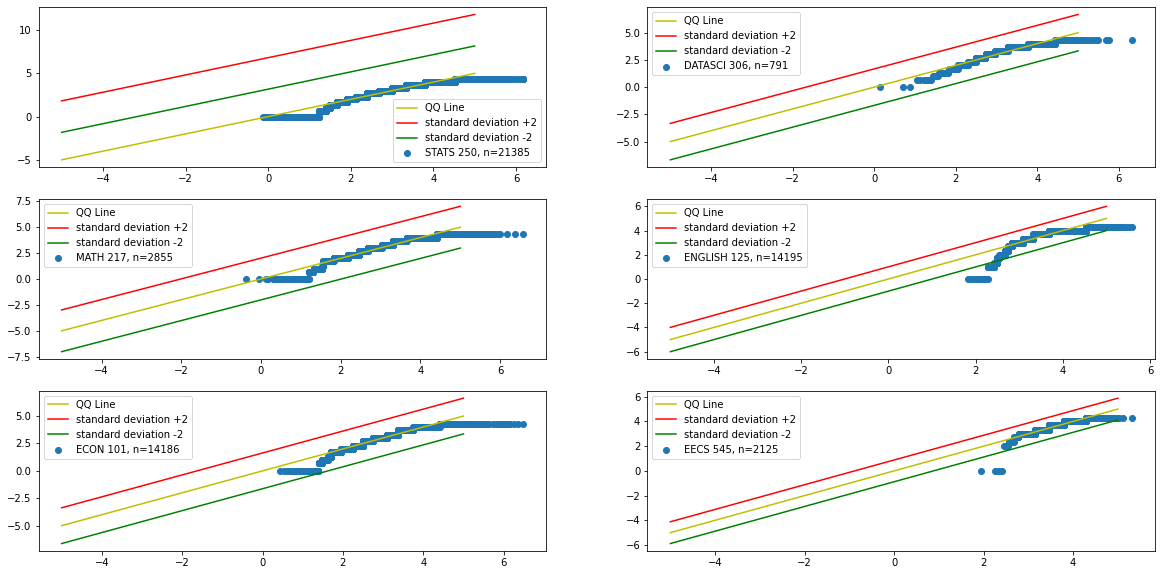

In [74]:
#import numpy as np 
#import pylab 
#import scipy.stats as stats
#from scipy.stats import norm
#import matplotlib.pyplot as plt
#

#from scipy.stats import probplot

#dist_a=norm.rvs(size=500)

#plt.hist(dist_a, bins=100);

#dist_b=norm.rvs(size=500)

#plt.hist(dist_b, bins=100);

#from numpy import quantiles
#quantiles_a=quantile(dist_a, [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#quantiles_a

#from numpy import linspace
#quantiles_b=quantile(dist_b, linspace(0,1,11))

#display(quantiles_a)
#display(quantiles_b)

#plt.scatter(quantiles_a, quantiles_b)

#plt.plot(quantiles_a, quantiles_b)

#plt.scatter(quantiles_a, quantiles_b)
#plt.gca().set_xlim([-4,4])
#plt.gca().set_ylim([-4,4])

#qa=quantile(norm.rvs(size=5000), linspace(0,1,1000))
#qb=quantile(norm.rvs(size=5000), linspace(0,1,1000))
#plt.plot(qa,qb)
#plt.gca().set_ylim(plt.gca().get_xlim())

#from scipy.stats import expon
#qc=quantile(expon,rvs(size=5000),linspace(0,1,1000))
#plt.plot(qa,qb)
#plt.scatter(qa,qc, c='r', s=2)
#plt.gca().set_ylim(plt.gca().get_xlim())

#from scipy.stats import probplot
#probplot(qa, dist=norm, plot=plt.gca());


#probplot(qc, dist=norm, plot=plt.gca());


#plt.plot(qa,qb)
#probplot(qc, dist=norm, plot=plt.gca());
#plt.gca().set_ylim(plt.gca().get_xlim());



import numpy as np 
import pylab 
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import probplot
from statistics import stdev


 # Now to get plots like this we want to convert our letter grades into numeric equivalents, so let's just create a mapping dictionary
grade_point_dict = dict(zip(VALID_GRADES, NUMERIC_GRADES))
#And now let's apply that dictionary to our dataframe, replacing values as appropriate
grade_dist_STATS_250 = STATS_250.dropna().apply(lambda x: toGradeLevel(x))
grade_dist_DATASCI_306 = DATASCI_306.dropna().apply(lambda x: toGradeLevel(x))
grade_dist_MATH_217 = MATH_217.dropna().apply(lambda x: toGradeLevel(x))
grade_dist_ENGLISH_125 = ENGLISH_125.dropna().apply(lambda x: toGradeLevel(x))
grade_dist_ECON_101 = ECON_101.dropna().apply(lambda x: toGradeLevel(x))
grade_dist_EECS_545 = EECS_545.dropna().apply(lambda x: toGradeLevel(x))

def grade_normality(): 
    import numpy as np 
    import pylab 
    import scipy.stats as stats
    from scipy.stats import norm
    import matplotlib
    from scipy.stats import probplot
    from numpy import linspace
    from numpy import quantile
    from scipy.stats import linregress
    
    stdev_STATS_250_A = grade_dist_STATS_250.std()
    stdev_STATS_250_B = grade_dist_STATS_250.std()
    stdev_DATASCI_306_A = grade_dist_DATASCI_306.std()
    stdev_DATASCI_306_B = grade_dist_DATASCI_306.std()
    stdev_MATH_217_A = grade_dist_MATH_217.std()
    stdev_MATH_217_B = grade_dist_MATH_217.std()
    stdev_ENGLISH_125_A = grade_dist_ENGLISH_125.std()
    stdev_ENGLISH_125_B = grade_dist_ENGLISH_125.std()
    stdev_ECON_101_A = grade_dist_ECON_101.std()
    stdev_ECON_101_B = grade_dist_ECON_101.std()
    stdev_EECS_545_A = grade_dist_EECS_545.std()
    stdev_EECS_545_B = grade_dist_EECS_545.std()
    
    
    fig, axs = plt.subplots(3, 2, figsize=(20,10))
    
    x=np.linspace(0,10)
    #og_line = 2*x + 1
    #parallel_line = 2*x - 1
    
    #m = (y2-y1)/(x2-x1)
    
    axs[0][0].scatter(quantile(norm.rvs(loc=norm.fit(grade_dist_STATS_250)[0], scale=norm.fit(grade_dist_STATS_250)[1], size=5000),
                    linspace(0, 1, len(grade_dist_STATS_250))),quantile(grade_dist_STATS_250,
                    linspace(0, 1, len(grade_dist_STATS_250))),label="STATS 250, n=21385")
    
    quantile(norm.rvs(size=5000), linspace(0,1,1000))
    norm.rvs(loc=0, scale=1, size=1, random_state=None)
    y1=x+2*stdev_STATS_250_A
    y2=x-2*stdev_STATS_250_B
    x=np.linspace(-5,5)
    
    axs[0][0].plot(x,x,label='QQ Line', color='y')
    axs[0][0].legend()
    axs[0][0].plot(x,y1,label='standard deviation +2', color='r')
    axs[0][0].legend()
    axs[0][0].plot(x,y2,label='standard deviation -2', color='g')
    axs[0][0].legend()
    
    axs[0][1].scatter(quantile(norm.rvs(loc=norm.fit(grade_dist_DATASCI_306)[0], scale=norm.fit(grade_dist_DATASCI_306)[1], size=5000),
                    linspace(0, 1, len(grade_dist_DATASCI_306))),quantile(grade_dist_DATASCI_306,
                    linspace(0, 1, len(grade_dist_DATASCI_306))),label="DATASCI 306, n=791")
    
    quantile(norm.rvs(size=5000), linspace(0,1,1000))
    norm.rvs(loc=0, scale=1, size=1, random_state=None)
    y1=x+2*stdev_DATASCI_306_A
    y2=x-2*stdev_DATASCI_306_B
    x=np.linspace(-5,5)
    axs[0][1].plot(x,x,label='QQ Line', color='y')
    axs[0][1].legend()
    x=np.linspace(-5,5)
    axs[0][1].plot(x,y1,label='standard deviation +2', color='r')
    axs[0][1].legend()
    x=np.linspace(-5,5)
    axs[0][1].plot(x,y2,label='standard deviation -2', color='g')
    axs[0][1].legend()
   
    axs[1][0].scatter(quantile(norm.rvs(loc=norm.fit(grade_dist_MATH_217)[0], scale=norm.fit(grade_dist_MATH_217)[1], size=5000),
                    linspace(0, 1, len(grade_dist_MATH_217))),quantile(grade_dist_MATH_217,
                    linspace(0, 1, len(grade_dist_MATH_217))),label="MATH 217, n=2855")
    
    #stats.probplot(grade_dist_MATH_217, plot=axs[1][0], fit=True)
    quantile(norm.rvs(size=5000), linspace(0,1,1000))
    norm.rvs(loc=0, scale=1, size=1, random_state=None)
    y1=x+2*stdev_MATH_217_A
    y2=x-2*stdev_MATH_217_B
    x=np.linspace(-5,5)
    axs[1][0].plot(x,x,label='QQ Line', color='y')
    axs[1][0].legend()
    x=np.linspace(-5,5)
    axs[1][0].plot(x,y1,label='standard deviation +2', color='r')
    axs[1][0].legend()
    x=np.linspace(-5,5)
    axs[1][0].plot(x,y2,label='standard deviation -2', color='g')
    axs[1][0].legend()
    
    axs[1][1].scatter(quantile(norm.rvs(loc=norm.fit(grade_dist_ENGLISH_125)[0], scale=norm.fit(grade_dist_ENGLISH_125)[1], size=5000),
                    linspace(0, 1, len(grade_dist_ENGLISH_125))),quantile(grade_dist_ENGLISH_125,
                    linspace(0, 1, len(grade_dist_ENGLISH_125))),label="ENGLISH 125, n=14195")
    
    quantile(norm.rvs(size=5000), linspace(0,1,1000))
    norm.rvs(loc=0, scale=1, size=1, random_state=None)
    y1=x+2*stdev_ENGLISH_125_A
    y2=x-2*stdev_ENGLISH_125_B
    x=np.linspace(-5,5)
    axs[1][1].plot(x,x,label='QQ Line', color='y')
    axs[1][1].legend()
    x=np.linspace(-5,5)
    axs[1][1].plot(x,y1,label='standard deviation +2', color='r')
    axs[1][1].legend()
    x=np.linspace(-5,5)
    axs[1][1].plot(x,y2,label='standard deviation -2', color='g')
    axs[1][1].legend()
    
    axs[2][0].scatter(quantile(norm.rvs(loc=norm.fit(grade_dist_ECON_101)[0], scale=norm.fit(grade_dist_ECON_101)[1], size=5000),
                    linspace(0, 1, len(grade_dist_ECON_101))),quantile(grade_dist_ECON_101,
                    linspace(0, 1, len(grade_dist_ECON_101))),label="ECON 101, n=14186")
   
    quantile(norm.rvs(size=5000), linspace(0,1,1000))
    norm.rvs(loc=0, scale=1, size=1, random_state=None)
    y1=x+2*stdev_ECON_101_A
    y2=x-2*stdev_ECON_101_B
    x=np.linspace(-5,5)
    axs[2][0].plot(x,x,label='QQ Line', color='y')
    axs[2][0].legend()
    x=np.linspace(-5,5)
    axs[2][0].plot(x,y1,label='standard deviation +2', color='r')
    axs[2][0].legend()
    x=np.linspace(-5,5)
    axs[2][0].plot(x,y2,label='standard deviation -2', color='g')
    axs[2][0].legend()
    
    axs[2][1].scatter(quantile(norm.rvs(loc=norm.fit(grade_dist_EECS_545)[0], scale=norm.fit(grade_dist_EECS_545)[1], size=5000),
                    linspace(0, 1, len(grade_dist_EECS_545))),quantile(grade_dist_EECS_545,
                    linspace(0, 1, len(grade_dist_EECS_545))),label="EECS 545, n=2125")
    
    quantile(norm.rvs(size=5000), linspace(0,1,1000))
    norm.rvs(loc=0, scale=1, size=1, random_state=None)
    y1=x+2*stdev_EECS_545_A
    y2=x-2*stdev_EECS_545_B
    x=np.linspace(-5,5)
    axs[2][1].plot(x,x,label='QQ Line', color='y')
    axs[2][1].legend()
    x=np.linspace(-5,5)
    axs[2][1].plot(x,y1,label='standard deviation +2', color='r')
    axs[2][1].legend()
    x=np.linspace(-5,5)
    axs[2][1].plot(x,y2,label='standard deviation -2', color='g')
    axs[2][1].legend()
    
    
grade_normality()

After determining the standard deviations of each specific data and amplifying the visualization by multiplying by 2, it can be observed that the high and low standard deviation lines cover the most central part of the data as well as most of the data.  These standard deviations could also be used as margins of error to help decide how far off from the line one can observe before expecting data inaccuracies to begin. It can be seen that the two positive standard deviations were calculated for STATS 250 rather than one negative and one positive standard deviation.  The coding was double-checked and confirmed to match the format used by the other 5 graphs.  The error in setup for the STATS 250 graph could be due to smaller graph dimensions limiting the amount of space necessary to create standard deviation measurements above and below the slope line.  